In [134]:
# !pip install numpy pandas matplotlib seaborn

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import sys
import re

In [136]:
path_to_log_file="./app.csv"
column_names=["DateTime","Level","Message"]
df=pd.read_csv(path_to_log_file,names=column_names)
df=df[df["Level"]=="INFO"]
df["Level"].iloc[0]
df

,DateTime,Level,Message
0,14/Apr/22 01:14,INFO,Work:0 minutes | Break:0 minutes
1,14/Apr/22 01:36,INFO,Work:2 minutes | Break:2 minutes
2,14/Apr/22 02:01,INFO,Work:0 minutes | Break:3 minutes
3,15/Apr/22 01:14,INFO,Work:0 minutes | Break:0 minutes
4,15/Apr/22 01:36,INFO,Work:3 minutes | Break:2 minutes
5,16/Apr/22 02:01,INFO,Work:0 minutes | Break:3 minutes


In [137]:
def get_info(message:str):
    match=re.match("Work:(\d*) minutes \| Break:(\d+) minutes",message)
    return match.groups()
def get_datetime(dt):
    dt=datetime.strptime(dt, '%d/%b/%y %H:%M')
    return (dt.strftime("%d/%b/%y"),dt.strftime("%H:%M"))
# pd.DataFrame(df.Message.map(get_info)).T
df[["Work","Break"]]=df.Message.map(get_info).to_list()
df[["Date","Time"]]=df.DateTime.map(get_datetime).to_list()
df.Work=df.Work.astype(int)
df.Break=df.Break.astype(int)
df


,DateTime,Level,Message,Work,Break,Date,Time
0,14/Apr/22 01:14,INFO,Work:0 minutes | Break:0 minutes,0,0,14/Apr/22,01:14
1,14/Apr/22 01:36,INFO,Work:2 minutes | Break:2 minutes,2,2,14/Apr/22,01:36
2,14/Apr/22 02:01,INFO,Work:0 minutes | Break:3 minutes,0,3,14/Apr/22,02:01
3,15/Apr/22 01:14,INFO,Work:0 minutes | Break:0 minutes,0,0,15/Apr/22,01:14
4,15/Apr/22 01:36,INFO,Work:3 minutes | Break:2 minutes,3,2,15/Apr/22,01:36
5,16/Apr/22 02:01,INFO,Work:0 minutes | Break:3 minutes,0,3,16/Apr/22,02:01


In [138]:
df=df.drop("Message",axis=1)
df=df.drop("DateTime",axis=1)

df

,Level,Work,Break,Date,Time
0,INFO,0,0,14/Apr/22,01:14
1,INFO,2,2,14/Apr/22,01:36
2,INFO,0,3,14/Apr/22,02:01
3,INFO,0,0,15/Apr/22,01:14
4,INFO,3,2,15/Apr/22,01:36
5,INFO,0,3,16/Apr/22,02:01


In [139]:
# for date,df in df.groupby("Date"):
#     print()
df=df[["Date","Work","Break"]].groupby("Date").agg(sum)
df

,Work,Break
Date,,
14/Apr/22,2,5
15/Apr/22,3,2
16/Apr/22,0,3


<AxesSubplot:xlabel='Date'>

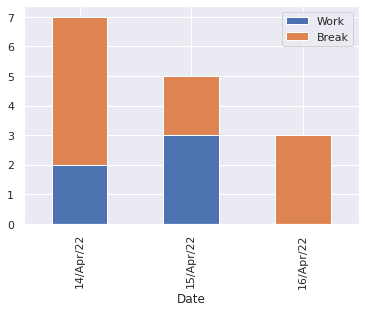

In [145]:
sns.set_theme()
df.plot(kind='bar', stacked=True)
 